In [0]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#using pandas library and 'read_csv' function to read
airbnb=pd.read_csv('listings.csv')

#show the first 10 lines
airbnb.head(10)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2060,https://www.airbnb.com/rooms/2060,20200313233810,2020-03-14,Modern NYC,NaN,"Lovely, spacious, sunny 1 BR apartment in 6th ...","Lovely, spacious, sunny 1 BR apartment in 6th ...",none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/3755/3f9d3...,NaN,2259,https://www.airbnb.com/users/show/2259,Jenny,2008-08-18,US,NaN,a few days or more,22%,50%,f,https://a0.muscache.com/im/users/2259/profile_...,https://a0.muscache.com/im/users/2259/profile_...,Washington Heights,0.0,0.0,['reviews'],t,f,"New York, NY, United States",Manhattan,Washington Heights,...,$0.00,1,730,1,1,730,730,1.0,730.0,4 weeks ago,t,30,60,90,365,2020-03-14,1,0,2008-09-22,2008-09-22,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,1,0,1,0,0.01
1,2595,https://www.airbnb.com/rooms/2595,20200313233810,2020-03-14,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,NaN,Apartment is located on 37th Street between 5t...,"Guests have full access to the kitchen, bathro...",I am a Sound Therapy Practitioner and Kundalin...,"Make yourself at home, respect the space and t...",NaN,NaN,https://a0.muscache.com/im/pictures/f0813a11-4...,NaN,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a day,87%,38%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, NY, United States",Midtown,Midtown,...,$0.00,7,1125,7,7,1125,1125,7.0,1125.0,4 months ago,t,4,34,64,339,2020-03-14,48,5,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.38
2,3831,https://www.airbnb.com/rooms/3831,20200313233810,2020-03-14,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,NaN,B52 bus for a 10-minute ride to downtown Brook...,"You will have the private, exclusive use of an...","We'll be around, but since you have the top fl...",Smoking - outside please; pets allowed but ple...,NaN,NaN,https://a0.muscache.com/im/pictures/e49999c2-9...,NaN,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New Y

In [0]:
#checking type of every column in the dataset
airbnb.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 106, dtype: object

In [0]:
airbnb.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [0]:
#checking amount of rows in given dataset to understand the size we are working with
print(len(airbnb))

50796


In [0]:
#after looking at the head of the dataset we already were able to notice some NaN values, therefore need to examine missing values further before continuing with analysis

#looking to find out first what columns have null values
#using 'sum' function will show us how many nulls are found in each column in dataset
obj = airbnb.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)

id , 0
listing_url , 0
scrape_id , 0
last_scraped , 0
name , 17
summary , 2455
space , 14199
description , 1231
experiences_offered , 0
neighborhood_overview , 17468
notes , 30273
transit , 17472
access , 23984
interaction , 20436
house_rules , 19860
thumbnail_url , 50796
medium_url , 50796
picture_url , 0
xl_picture_url , 50796
host_id , 0
host_url , 0
host_name , 5
host_since , 5
host_location , 144
host_about , 20325
host_response_time , 19006
host_response_rate , 19006
host_acceptance_rate , 14015
host_is_superhost , 5
host_thumbnail_url , 5
host_picture_url , 5
host_neighbourhood , 7336
host_listings_count , 5
host_total_listings_count , 5
host_verifications , 0
host_has_profile_pic , 5
host_identity_verified , 5
street , 0
neighbourhood , 15
neighbourhood_cleansed , 0
neighbourhood_group_cleansed , 0
city , 156
state , 7
zipcode , 455
market , 94
smart_location , 0
country_code , 0
country , 0
latitude , 0
longitude , 0
is_location_exact , 0
property_type , 0
room_type , 0
accomm

In [0]:
# we will remove columns that are not important and handle missing data.
# if the column  
# 1. is hard to understand
# 2. has too many null values
# 3. irrelevant
# 4. repetitive
# we remove it.

In [0]:
my_string = "id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month"
my_list = my_string.split(",")
print(my_list)
list_tp_keep = ['id', 'host_id', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude',  'room_type', 'bathrooms', 'bedrooms', 'beds', 'bed_type',  'price', 'weekly_price', 'monthly_price',  'minimum_nights', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month']
# using list comprehension to perform task 
res = [i for i in my_list if i not in list_tp_keep] 
  
# printing result, and this should be the columns to drop
print ("The list after performing remove operation is : " + str(res)) 

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

In [0]:
#drop columns
airbnb.drop([ 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact', 'property_type', 'accommodates', 'amenities', 'square_feet', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'calendar_last_scraped', 'first_review', 'last_review', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'requires_license', 'license', 'jurisdiction_names', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)
#examing the changes
airbnb.head(10)

,id,host_id,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,latitude,longitude,room_type,bathrooms,bedrooms,beds,bed_type,price,weekly_price,monthly_price,minimum_nights,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_value,calculated_host_listings_count,reviews_per_month
0,2060,2259,Manhattan,Washington Heights,Manhattan,10040,40.85722,-73.93790,Private room,NaN,1.0,2.0,Real Bed,$100.00,NaN,NaN,1,365,1,0,80.0,NaN,1,0.01
1,2595,2845,Midtown,Midtown,Manhattan,10018,40.75362,-73.98377,Entire home/apt,1.0,0.0,1.0,Real Bed,$225.00,"$1,995.00",NaN,7,339,48,5,94.0,9.0,2,0.38
2,3831,4869,Brooklyn,Clinton Hill,Brooklyn,11238,40.68514,-73.95976,Entire home/apt,1.0,1.0,4.0,Real Bed,$89.00,$575.00,"$2,100.00",1,151,313,69,90.0,8.0,1,4.71
3,5099,7322,Manhattan,Murray Hill,Manhattan,10016,40.74767,-73.97500,Entire home/apt,1.0,1.0,1.0,Real Bed,$200.00,NaN,NaN,3,0,78,8,90.0,9.0,1,0.59
4,5114,7345,Lower East Side,Lower East Side,Manhattan,10002,40.71910,-73.99040,Private room,NaN,1.0,1.0,Real Bed,$94.00,NaN,NaN,1,109,75,0,94.0,10.0,3,0.56
5,5121,7356,Bedford-Stuyvesant,Bedford-Stuyvesant,Brooklyn,11216,40.68688,-73.95596,Private room,NaN,1.0,1.0,Futon,$60.00,NaN,NaN,29,365,50,1,90.0,9.0,1,0.38
6,5178,8967,Manhattan,Hell's Kitchen,Manhattan,10019,40.76489,-73.98493,Private room,1.0,1.0,1.0,Real Bed,$79.00,$470.00,NaN,2,207,470,54,84.0,8.0,1,3.56
7,5203,7490,Upper West Side,Upper West Side,Manhattan,10025,40.80178,-73.96723,Private room,1.0,1.0,1.0,Real Bed,$79.00,NaN,NaN,2,0,118,0,98.0,10.0,1,0.92
8,5238,7549,Lower East Side,Chinatown,Manhattan,10002,40.71344,-73.99037,Entire home/apt,1.0,1.0,2.0,Real Bed,$150.00,NaN,NaN,1,79,161,5,94.0,9.0,4,1.26
9,5441,7989,Manhattan,Hell's Kitchen,Manhattan,10036,40.76160,-73.98893,Private room,1.0,1.0,1.0,Real Bed,$99.00,NaN,NaN,2,1,213,39,97.0,10.0,1,1.59


In [0]:
#columns left after removing
airbnb.columns 

Index(['id', 'host_id', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'zipcode', 'latitude', 'longitude',
       'room_type', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'weekly_price', 'monthly_price', 'minimum_nights', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [0]:
obj = airbnb.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)

id , 0
host_id , 0
neighbourhood , 15
neighbourhood_cleansed , 0
neighbourhood_group_cleansed , 0
zipcode , 455
latitude , 0
longitude , 0
room_type , 0
bathrooms , 54
bedrooms , 77
beds , 482
bed_type , 0
price , 0
weekly_price , 45411
monthly_price , 46119
minimum_nights , 0
availability_365 , 0
number_of_reviews , 0
number_of_reviews_ltm , 0
review_scores_rating , 11431
review_scores_value , 11482
calculated_host_listings_count , 0
reviews_per_month , 10453


In [0]:
# looks it still need one more cleaning
# weekly and monthly price have too many null values, zipcode null values is similar to neighborhood and are hard to replace so should be dropped
# other null values should be replaced by 0

airbnb.drop([ 'zipcode', 'weekly_price' , 'monthly_price', 'neighbourhood'], axis=1, inplace=True)

In [0]:
#replacing all NaN values in 'reviews_per_month' with 0
airbnb.fillna({'bathrooms':0}, inplace=True)
airbnb.fillna({'bedrooms':0}, inplace=True)
airbnb.fillna({'beds':0}, inplace=True)
airbnb.fillna({'review_scores_rating':0}, inplace=True)
airbnb.fillna({'review_scores_value':0}, inplace=True)
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
airbnb.reviews_per_month.isnull().sum()
#replacing all NaN values in 'name' with 0
airbnb.fillna({'name':0}, inplace=True)

In [0]:
#Summary of Dataset after preprocessing
print('Rows     :',airbnb.shape[0])
print('Columns  :',airbnb.shape[1])
print('\nFeatures :\n     :',airbnb.columns.tolist())
print('\nMissing values    :',airbnb.isnull().values.sum())
print('\nUnique values :  \n',airbnb.nunique())

Rows     : 50796
Columns  : 20

Features :
     : ['id', 'host_id', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'room_type', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'minimum_nights', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month']

Missing values    : 0

Unique values :  
 id                                50796
host_id                           38096
neighbourhood_cleansed              223
neighbourhood_group_cleansed          5
latitude                          19348
longitude                         15171
room_type                             4
bathrooms                            17
bedrooms                             15
beds                                 24
bed_type                              5
price                               681
minimum_nights                      114
availability_365                 

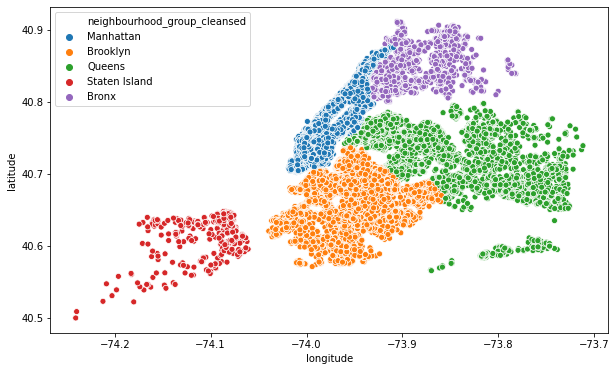

In [0]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group_cleansed)
plt.ioff()

In [0]:
airbnb.to_csv('airbnb_cleaned.csv')
from google.colab import files
files.download('airbnb_cleaned.csv')